In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neural_framework.network import Network
from neural_framework.layer import FullyConnectedLayer, ActivationLayer
from neural_framework.loss import MSE
from neural_framework.activation import tanh, tanh_prime, relu, relu_prime, sigmoid, sigmoid_prime

import csv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
# TODO: Uncomment to Learn the XOR function

# # training data
# x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
# y_train = np.array([[[0]], [[1]], [[1]], [[0]]])


# TODO: Uncomment to learn a spiral function
with open('train_data.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

x_train = np.array([list(map(float, row[:-1])) for row in data])
#generate X_train with varied number of features x1, x2, x1_square, x2_square, x1_x2, sin(x1), sin(x2)
x_train = np.array([[[row[0], row[1], row[0]**2, row[1]**2, row[0]*row[1], np.sin(row[0]), np.sin(row[1])]] for row in x_train])

y_train = np.array([list(map(float, row[-1:])) for row in data])


with open('test_data.csv', 'r') as file:
    reader = csv.reader(file)
    data = list(reader)

x_test = np.array([list(map(float, row[:-1])) for row in data])
#generate X_train with varied number of features x1, x2, x1_square, x2_square, x1_x2, sin(x1), sin(x2)
x_test = np.array([[[row[0], row[1], row[0]**2, row[1]**2, row[0]*row[1], np.sin(row[0]), np.sin(row[1])]] for row in x_test])

y_test = np.array([list(map(float, row[-1:])) for row in data])

In [3]:
mseloss = MSE()

# network
net = Network(loss=mseloss)
net.add(FullyConnectedLayer(7, 5))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FullyConnectedLayer(5, 5))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FullyConnectedLayer(5, 1))
net.add(ActivationLayer(tanh, tanh_prime))

print(net)

Network(
  (0): FullyConnectedLayer (input: 7, output: 5)
  (1): ActivationLayer (input: 1, output: 1)
  (2): FullyConnectedLayer (input: 5, output: 5)
  (3): ActivationLayer (input: 1, output: 1)
  (4): FullyConnectedLayer (input: 5, output: 1)
  (5): ActivationLayer (input: 1, output: 1)
  (loss): MSE
)


epoch 1/1000   error=1.087521
epoch 2/1000   error=1.010264
epoch 3/1000   error=0.994501
epoch 4/1000   error=0.986533
epoch 5/1000   error=0.980531
epoch 6/1000   error=0.974870
epoch 7/1000   error=0.969048
epoch 8/1000   error=0.962911
epoch 9/1000   error=0.956436
epoch 10/1000   error=0.949608
epoch 11/1000   error=0.942351
epoch 12/1000   error=0.934587
epoch 13/1000   error=0.926853
epoch 14/1000   error=0.919147
epoch 15/1000   error=0.911579
epoch 16/1000   error=0.903991
epoch 17/1000   error=0.896181
epoch 18/1000   error=0.887960
epoch 19/1000   error=0.879199
epoch 20/1000   error=0.869852
epoch 21/1000   error=0.859962
epoch 22/1000   error=0.849623
epoch 23/1000   error=0.838895
epoch 24/1000   error=0.827765
epoch 25/1000   error=0.816239
epoch 26/1000   error=0.804631
epoch 27/1000   error=0.794349
epoch 28/1000   error=0.785007
epoch 29/1000   error=0.776392
epoch 30/1000   error=0.768390
epoch 31/1000   error=0.760871
epoch 32/1000   error=0.753739
epoch 33/1000   e

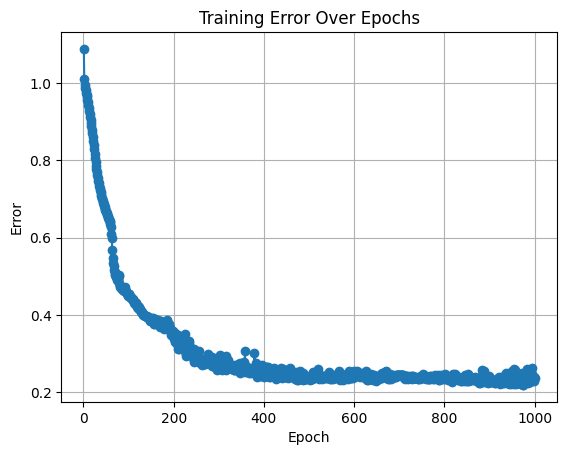

In [4]:
net.fit(x_train=x_train, y_train=y_train, epochs=1000, learning_rate=0.001)
net.plot()

In [5]:
# test
y_pred = net.predict(x_test)

# Convert the list of predictions to a NumPy array
y_pred = np.array(y_pred)

# Apply np.where to classify predictions
y_pred = np.where(y_pred > 0, 1, -1)

In [6]:
print(classification_report(y_test.squeeze(), y_pred.squeeze()))

              precision    recall  f1-score   support

        -1.0       0.87      0.91      0.89        99
         1.0       0.91      0.86      0.88       101

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200

